In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("heart.csv")
data_Deep = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
def remove_outliers(df, columns):
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
  return df

outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data = remove_outliers(data, outlier_columns)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,54.057054,0.714730,0.964730,129.957469,242.134855,0.141079,0.524896,149.506224,0.328838,0.986203,1.415975,0.738589,2.310166,0.526971
std,9.142455,0.451777,1.029574,15.321181,45.094967,0.348284,0.513982,22.721506,0.470035,1.052420,0.599579,1.017053,0.618393,0.499531
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
sex_count=data['sex'].value_counts().reset_index(name='Count')
sex_count

,sex,Count
0,1,689
1,0,275


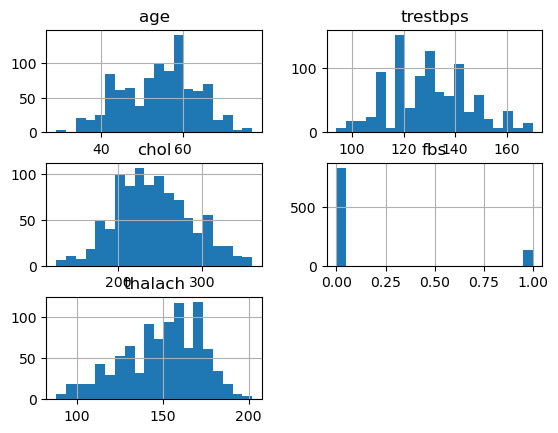

In [11]:
data.hist(column=['age', 'trestbps', 'chol', 'fbs', 'thalach'], bins=20)
plt.show()

In [12]:
data['cp'].value_counts()

cp
0    454
2    272
1    164
3     74
Name: count, dtype: int64

<Axes: title={'center': 'Number of Major Vessels Distribution'}, xlabel='ca'>

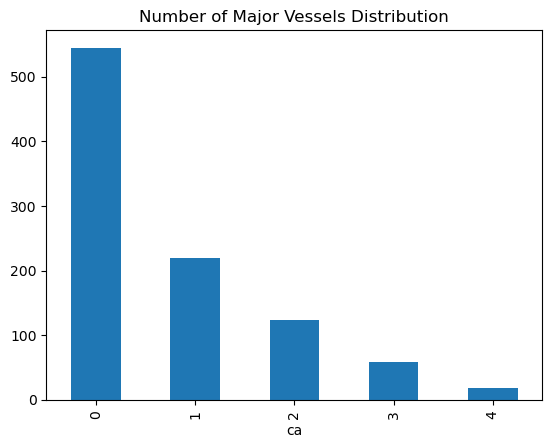

In [13]:
data['ca'].value_counts().plot(kind='bar', title='Number of Major Vessels Distribution')

In [14]:
target_count=data['target'].value_counts().reset_index(name='Count')
target_count

,target,Count
0,1,508
1,0,456


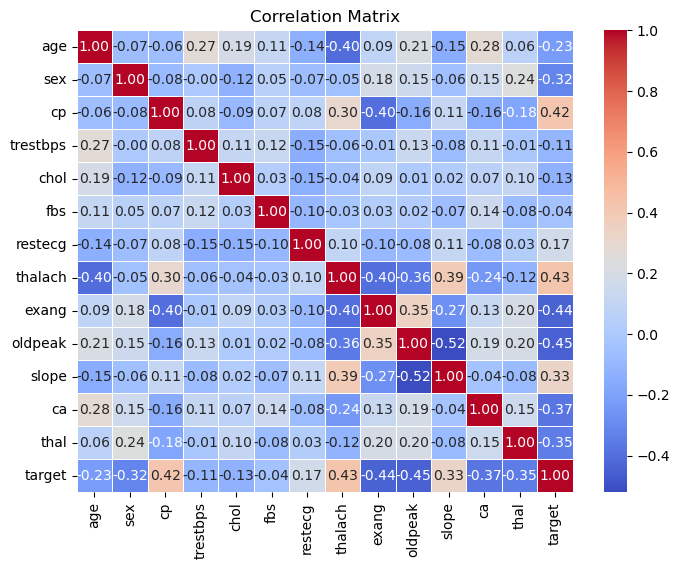

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.073993,-0.064323,0.269362,0.187829,0.109329,-0.138529,-0.402295,0.087455,0.205841,-0.153800,0.280354,0.063173,-0.227602
sex,-0.073993,1.000000,-0.081931,-0.002355,-0.123396,0.051455,-0.074475,-0.047625,0.183040,0.149620,-0.055996,0.153932,0.235266,-0.317876
cp,-0.064323,-0.081931,1.000000,0.076465,-0.089317,0.071809,0.082116,0.301058,-0.400875,-0.156566,0.109582,-0.157566,-0.183412,0.419801
trestbps,0.269362,-0.002355,0.076465,1.000000,0.113626,0.123920,-0.151314,-0.060029,-0.009736,0.133319,-0.077201,0.113774,-0.012197,-0.109955
chol,0.187829,-0.123396,-0.089317,0.113626,1.000000,0.031780,-0.146065,-0.042601,0.087461,0.013200,0.020391,0.066656,0.103657,-0.127070
fbs,0.109329,0.051455,0.071809,0.123920,0.031780,1.000000,-0.100853,-0.025174,0.027136,0.016365,-0.067493,0.139401,-0.078023,-0.039799
restecg,-0.138529,-0.074475,0.082116,-0.151314,-0.146065,-0.100853,1.000000,0.097796,-0.096248,-0.083160,0.112938,-0.078915,0.029587,0.171295
thalach,-0.402295,-0.047625,0.301058,-0.060029,-0.042601,-0.025174,0.097796,1.000000,-0.396653,-0.355052,0.388970,-0.242853,-0.121452,0.426512
exang,0.087455,0.183040,-0.400875,-0.009736,0.087461,0.027136,-0.096248,-0.396653,1.000000,0.351351,-0.272164,0.125699,0.195338,-0.438061
oldpeak,0.205841,0.149620,-0.156566,0.133319,0.013200,0.016365,-0.083160,-0.355052,0.351351,1.000000,-0.520796,0.185128,0.196936,-0.446587


In [17]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
X = data.drop(columns=["age","sex","trestbps","chol","fbs","restecg","target"], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(771, 7) (193, 7)
(771,) (193,)


In [19]:
selector = SelectKBest(f_classif, k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
classifier.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_pred = classifier.predict(X_test_selected) 
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91  9]
 [21 72]]


0.844559585492228

### SUPPORT VECTOR MACHINES

In [23]:
from sklearn.svm import SVC

In [24]:
classifier = SVC(kernel = 'rbf',degree=6, random_state = 0)

In [25]:
classifier.fit(X_train_selected, y_train)

SVC(degree=6, random_state=0)

In [26]:
y_pred = classifier.predict(X_test_selected)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[70 30]
 [23 70]]


0.7253886010362695

### RANDOMFORESTCLASSIFIER

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf = RandomForestClassifier(max_leaf_nodes=6,random_state=0)

In [30]:
clf.fit(X_train_selected, y_train)

RandomForestClassifier(max_leaf_nodes=6, random_state=0)

In [31]:
y_pred = clf.predict(X_test_selected)

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[82 18]
 [ 7 86]]


0.8704663212435233

### LOGISTIC_REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [35]:
clf.fit(X_train_selected, y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(X_test_selected)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[78 22]
 [17 76]]


0.7979274611398963

### XGBOOST

In [38]:
from xgboost import XGBClassifier


In [39]:
xgb=XGBClassifier()

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_train_selected, y_train, cv=5)
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.9818433179723502


In [41]:
xgb_classifier =XGBClassifier(reg_alpha=0.1, reg_lambda=0.1)


In [42]:
xgb_classifier =XGBClassifier(learning_rate=0.1)


In [43]:
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

selector = SelectFromModel(estimator=xgb_classifier).fit(X_train_selected, y_train)
X_train_selected = selector.transform(X_train_selected)
X_test_selected = selector.transform(X_test_selected)

In [44]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.1, 0.01],
    'reg_lambda': [0.1, 0.01]
}

xgb_classifier = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [45]:
best_params

{'learning_rate': 0.001,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1}

In [46]:
best_score

0.7626309174696272

### BEST MODEL RANDOM FOREST CLASSIFIER